In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

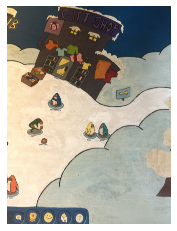

In [14]:
#show the original image
I = np.array(image.imread('images/table2.jpg'))
plt.imshow(I)
plt.axis("off")
plt.show()

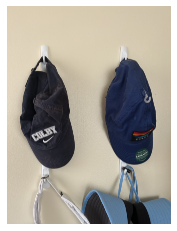

In [15]:
#show the original image
I = np.array(image.imread('images/hats.jpg'))
plt.imshow(I)
plt.axis("off")
plt.show()

**1) Convert image to grayscale**

In [16]:
def grayscale(image_name):
    I = np.array(image.imread(image_name))
    
    G = 0.3*I[:,:,0] + 0.59*I[:,:,1] + 0.11*I[:,:,2]
    plt.imshow(G, cmap = 'gray')
    plt.axis("off")
    plt.show()
    
    return G

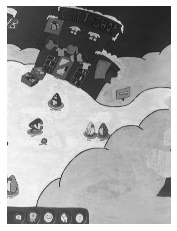

In [17]:
#test it on a photo
table = grayscale('images/table2.jpg')

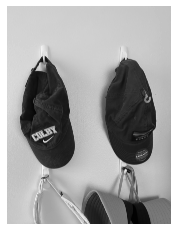

In [18]:
#set the other photo to grayscale
hats = grayscale('images/hats.jpg')

**2) Use the gradient**

In [19]:
def gradient(G, delta):
    #find the dimensions of the image
    width = G.shape[1]
    height = G.shape[0]
    h = 1
    
    #create a blank image of the same dimensions
    G_new = np.zeros((height , width))
    
    for i in range(1, width - 2):
        for j in range(1, height - 2):
            #loop through every pixel
            
            #calcuate the partial x deriv.
            G_x = (G[j+1, i] - G[j-1, i])/(2*h) - ((h**2)/6)
            #calculate the partial y deriv
            G_y = (G[j, i+1] - G[j, i-1])/(2*h) - ((h**2)/6)
            
            #calculate the vector norm at pixel i,j
            grad = np.sqrt(((np.abs(G_x))**2 + (np.abs(G_y))**2))
                   
            if grad >= delta:
                #if higher than the threshold, replace pixel with a pixel of value 255
                G_new[j,i] = 255 
                
    return G_new


(-0.5, 3023.5, 4031.5, -0.5)

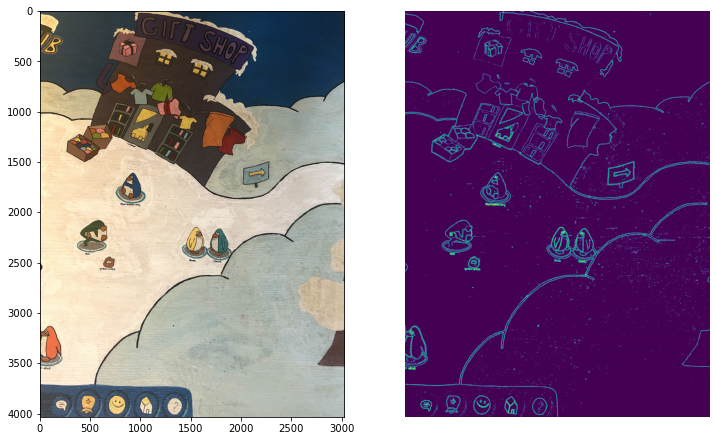

In [20]:
#plot the images side by side (image 1)
table2 = gradient(table, 17)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table2)
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")

Figure 1: Image 1 using the gradient method (threshold = 17)

(-0.5, 3023.5, 4031.5, -0.5)

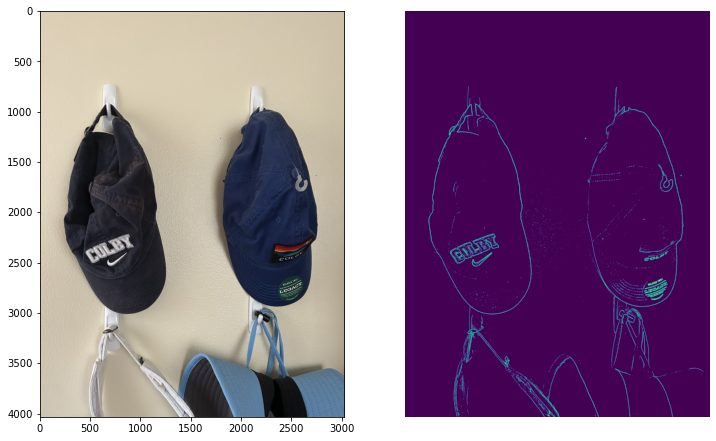

In [21]:
#plot the images side by side (image 2)
hats2 = gradient(hats, 14)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats2)
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 2: Image 2 using the gradient method (threshold = 14)

(-0.5, 3023.5, 4031.5, -0.5)

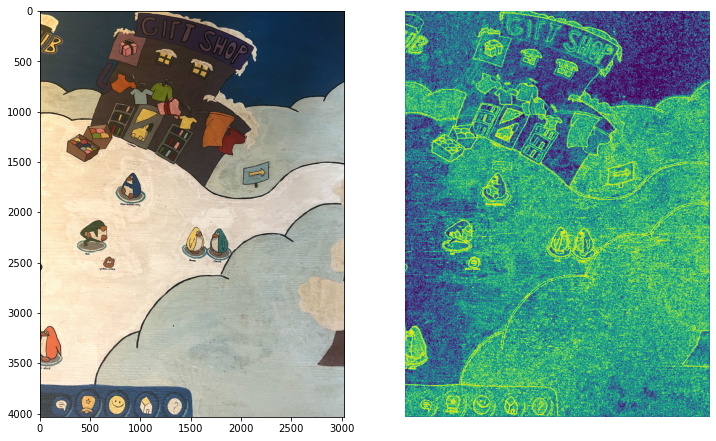

In [22]:
#test it on higher and lower threshold values

#try delta = 4
table2 = gradient(table, 4)

#plot them side by side
fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table2)
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")

Figure 3: Image 1 using different gradient methods (threshold of 4)

(-0.5, 3023.5, 4031.5, -0.5)

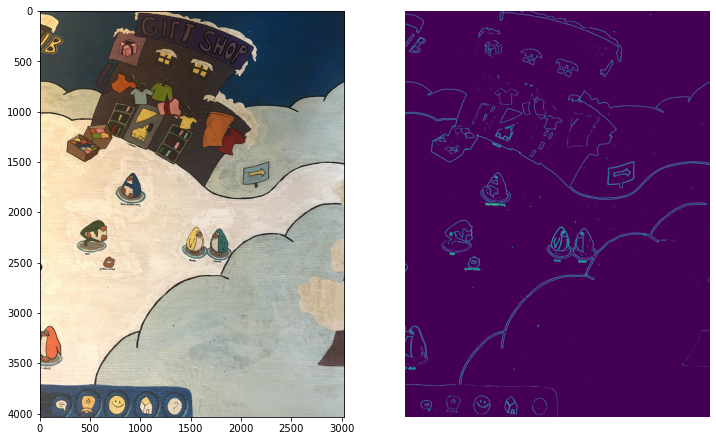

In [23]:
#try delta = 30
table2 = gradient(table, 30)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table2)
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")

Figure 4: Gradient method with a high threshold (30) on image 1

(-0.5, 3023.5, 4031.5, -0.5)

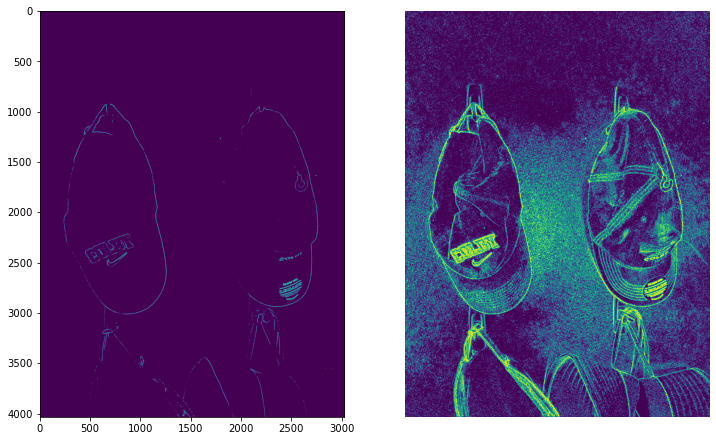

In [24]:
#plot different thresholds side by side 
left = gradient(hats, 30)
right = gradient(hats, 4)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[0].imshow(left)
axes[1].imshow(right)
plt.axis("off")

Figure 5: Gradients with different thresholds side-by-side on image 2

(-0.5, 3023.5, 4031.5, -0.5)

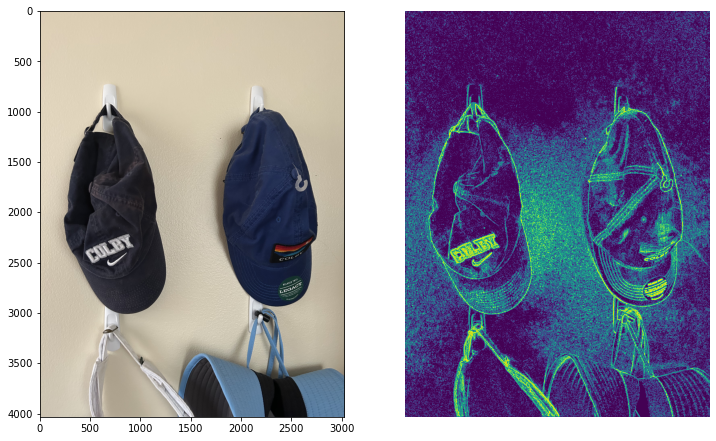

In [25]:
#test it on higher and lower threshold values (image 2)

#try delta = 4
hats2 = gradient(hats, 4)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats2)
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 6: Image 2 using gradient at different thresholds (low, threshold = 4)

(-0.5, 3023.5, 4031.5, -0.5)

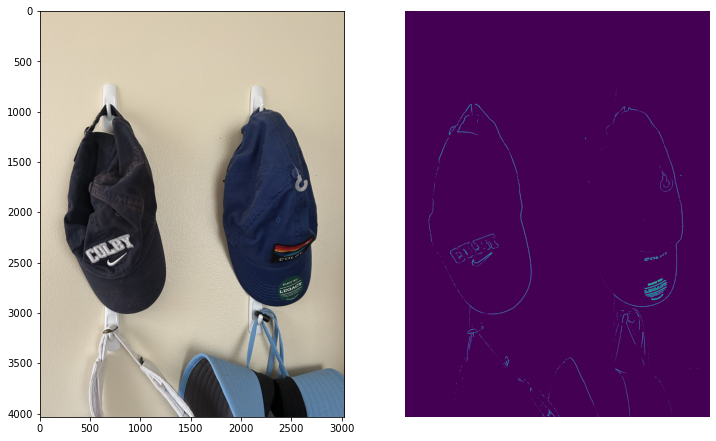

In [26]:
#try delta = 30
hats2 = gradient(hats, 30)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats2)
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 7: Image 2 using gradient at different thresholds (high, thresholds = 30)

**3) Use the Heissian matrix**

In [27]:
#Hessian mx

def Heissian(G, delta):
    #dimensions of the image
    width = G.shape[1]
    height = G.shape[0]

    h = 1
    
    #2x2 matrix of zeros
    H = np.zeros((2,2))
    
    #blank image of the same dimensions
    G_new = np.zeros((height , width))

    for i in range(1, width - 2):
        #iterate through the width
        for j in range(1, height - 2):
            #iterate through the height
            
            #calcuate the partial derivatives
            p_xx = ((G[j+1, i] - G[j, i])/(2*h)) - ((h**2)/(6)) 
            p_xy = ((G[j, i] - G[j+1, i+1])/(2*h)) - ((h**2)/(6))
            p_yx = ((G[j+1, i+1] - G[j, i])/(2*h)) - ((h**2)/(6))
            p_yy = ((G[j, i+1] - G[j, i])/(2*h)) - ((h**2)/(6))
            
            #set the values in the matrix
            H[0,0] = p_xx
            H[0,1] = p_xy
            H[1,0] = p_yx
            H[1,1] = p_yy

            #calculate the determinant
            det = np.abs(H[0,0] * H[1,1] - H[0,1] * H[1,0])

            if det > delta:
                G_new[j,i] = 255
    return G_new

(-0.5, 3023.5, 4031.5, -0.5)

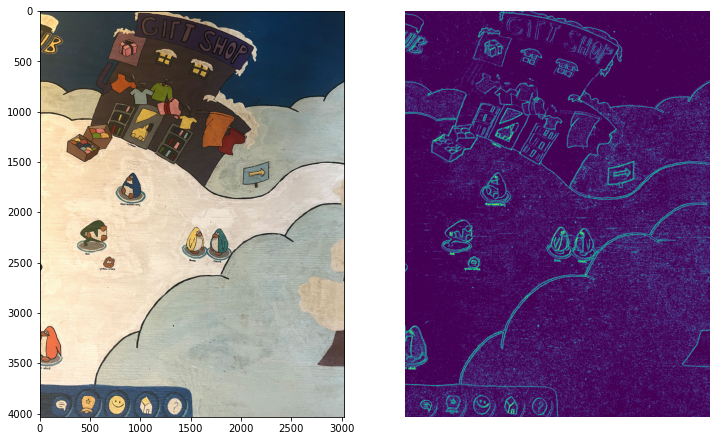

In [28]:
#plot images side by side (image 1)

table3 = Heissian(table, 58)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table3)
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")

Figure 8: Hessian method using the appropriate threshold on image 1(threshold = 58)

(-0.5, 3023.5, 4031.5, -0.5)

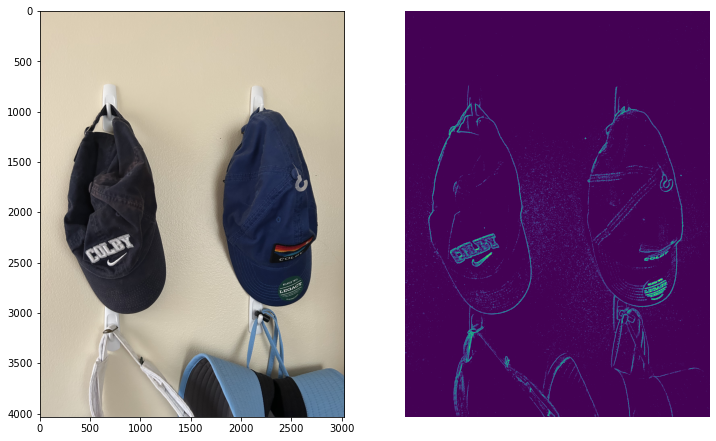

In [29]:
#plot images side by side (image 2)

hats3 = Heissian(hats, 50)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats3)
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 9: Image 2 using the Hessian method and appropriate threshold (threshold = 50)

(-0.5, 3023.5, 4031.5, -0.5)

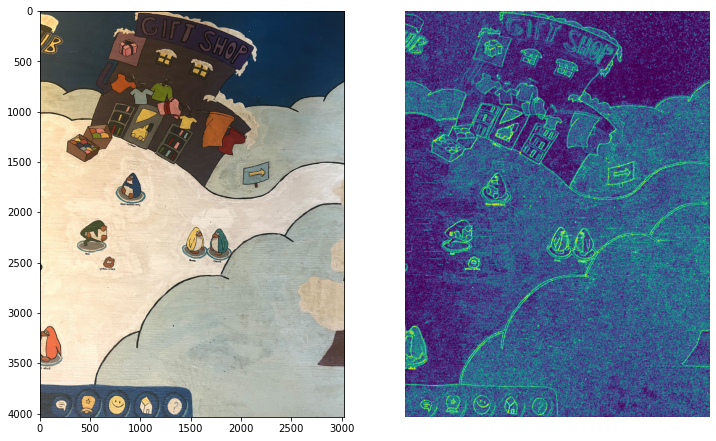

In [30]:
#try it on higher and lower threshold values

#try delta = 15
table3 = Heissian(table, 15)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table3)
plt.axis("off")
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")



Figure 910: Hessian method using a low threshold (15) on image 1

(-0.5, 3023.5, 4031.5, -0.5)

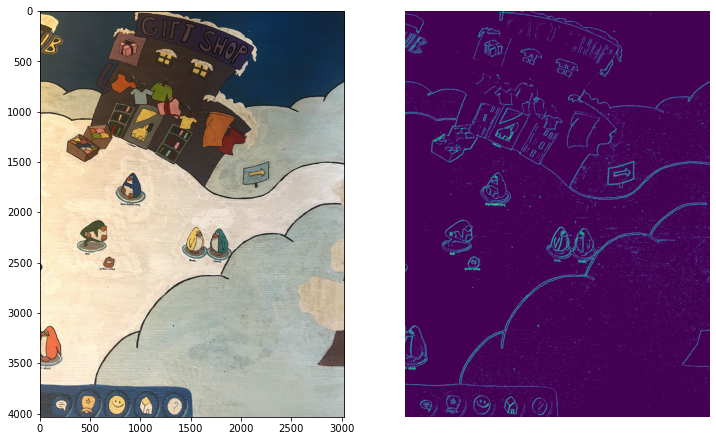

In [31]:
#try delta = 130
table3 = Heissian(table, 130)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(table3)
plt.axis("off")
axes[0].imshow(np.array(image.imread('images/table2.jpg')))
plt.axis("off")

Figure 11: Hessian method using a high threshold (130) on image 1

(-0.5, 3023.5, 4031.5, -0.5)

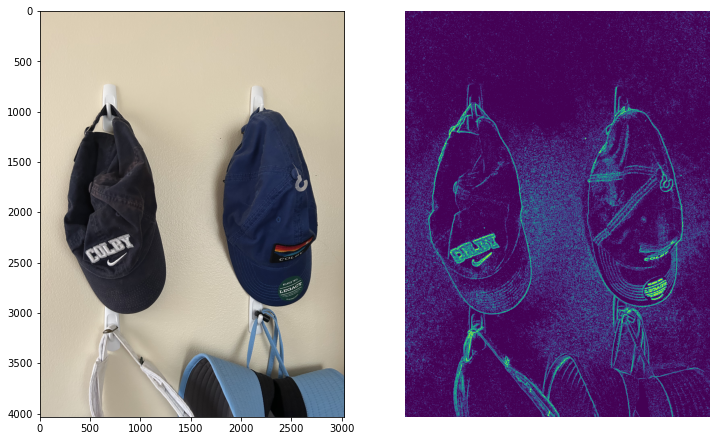

In [32]:
#try it on higher and lower threshold values (image 2)

#try delta = 15
hats3 = Heissian(hats, 15)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats3)
plt.axis("off")
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 12: Hessian method on different thresholds (threshold = 15) on image 2

(-0.5, 3023.5, 4031.5, -0.5)

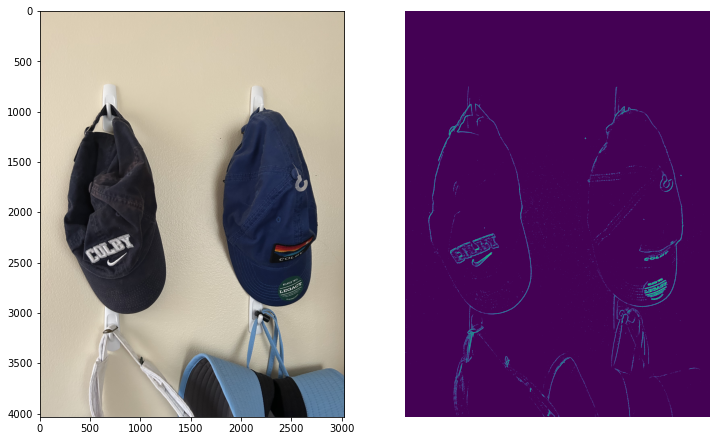

In [33]:
#try delta = 100
hats3 = Heissian(hats, 100)

fig, axes = plt.subplots(1,2, figsize = (12,8))
axes[1].imshow(hats3)
plt.axis("off")
axes[0].imshow(np.array(image.imread('images/hats.jpg')))
plt.axis("off")

Figure 13: Hessian method using different thresholds (threshold = 100) on image 2